In [1]:
!git clone https://github.com/blaze-fire/Explainable-AI.git

Cloning into 'Explainable-AI'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


In [2]:
#Please restart the runtime after running this command and then proceed
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 66.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
!cp /content/Explainable-AI/XAI.py /content/XAI.py 

In [4]:
import pandas as pd

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

In [5]:
from XAI import explain_local, explain_global

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
import pandas as pd 


In [7]:
df = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/he-public-data/Training_datad9b6ebc.csv")

In [8]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC()

#Explain Local

##Example of training with only embeddings

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 
 Value Counts of target class 
5    6441
4    1485
1     876
3     705
2     493
Name: Score, dtype: int64 


Accuracy Score : 0.9994


 WordCloud of most important words in columns 




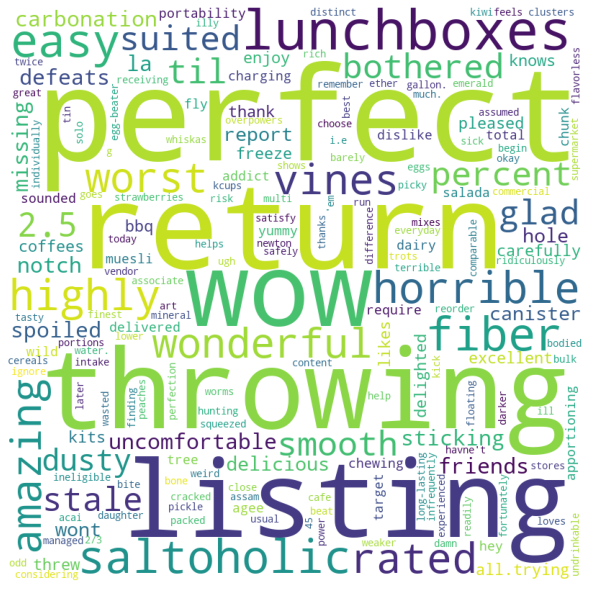

In [9]:
X = df['Summary'].fillna('None')[:10000]
y = df['Score'][:10000]
X1 = df['Text'][:10000]

cvec = CountVectorizer(tokenizer=word_tokenize, stop_words='english', token_pattern=None).fit(X)
cvec1 = CountVectorizer(tokenizer=word_tokenize, stop_words='english', token_pattern=None).fit(X1)

feat_names = cvec.get_feature_names() + cvec1.get_feature_names()

X_transformed = cvec.transform(X)
X1_transformed = cvec1.transform(X1)
values = hstack((X_transformed, X1_transformed))


svm_clf = LinearSVC()
svm_clf.fit(values, y)
explain_local(df[:10000], svm_clf, 'Score', embedings = {'feature_names' : feat_names, 'embeddings_values' : values})

#Example of training with only numerical columns

In [10]:
svm_clf = LinearSVC()
svm_clf.fit(df.select_dtypes(exclude='object')[:10000], df['Score'][:10000])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

In [11]:
columns = df.select_dtypes(exclude='object').columns.values

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat


 
 Value Counts of target class 
5    6441
4    1485
1     876
3     705
2     493
Name: Score, dtype: int64 


Accuracy Score : 0.6441

Some examples where your model misclassified 


Id                            280338
HelpfulnessNumerator               0
HelpfulnessDenominator             3
Time                      1305676800
Score                              2
Name: 6878, dtype: int64 
 predicted : 5, 	 true : 2 


Id                            385190
HelpfulnessNumerator               0
HelpfulnessDenominator             1
Time                      1332374400
Score                              2
Name: 8108, dtype: int64 
 predicted : 5, 	 true : 2 


Id                             45510
HelpfulnessNumerator               0
HelpfulnessDenominator             0
Time                      1335225600
Score                              4
Name: 3592, dtype: int64 
 predicted : 5, 	 true : 4 


Id                             16083
HelpfulnessNumerator               0
HelpfulnessDenomi

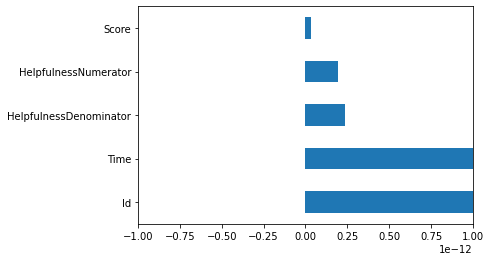



Some features with low feature importance are: 

feature : ['HelpfulnessDenominator'] , the reason could be its variance is only : 70.32301566156589 compared to 26842492721.714455 of most important feature ['Id'] 
feature : ['HelpfulnessNumerator'] , the reason could be its variance is only : 58.55017337733438 compared to 26842492721.714455 of most important feature ['Id'] 
feature : ['Score'] , the reason could be its variance is only : 1.6553366936696596 compared to 26842492721.714455 of most important feature ['Id'] 


In [12]:
explain_local(df.select_dtypes(exclude='object')[:10000], svm_clf, 'Score', num_cols = columns)

#Explain Global

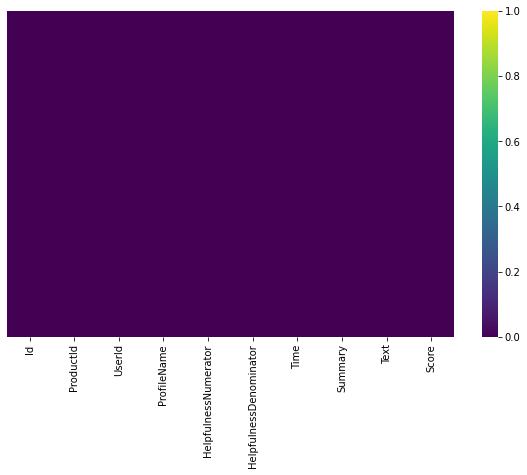

Columns on which embedings will be applied : ['ProfileName', 'Summary', 'Text']


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)




Accuracy with only Categorical columns is : 0.686969696969697 


              precision    recall  f1-score   support

           1       0.59      0.51      0.55       607
           2       0.26      0.18      0.21       317
           3       0.32      0.25      0.28       466
           4       0.35      0.31      0.33       958
           5       0.81      0.88      0.84      4252

    accuracy                           0.69      6600
   macro avg       0.47      0.43      0.44      6600
weighted avg       0.66      0.69      0.67      6600




Alert! your recall   for target label 2 is low (value : 0.17981072555205047), supporting values 317
Reason could be 2 appears only 992 times while length of dataframe is 20000














 Most important words in columns 




 WordCloud of most important words in columns 




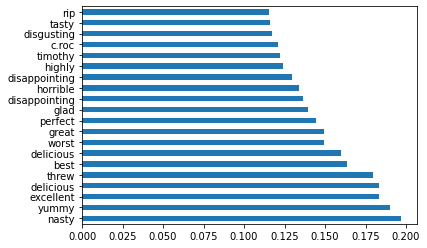

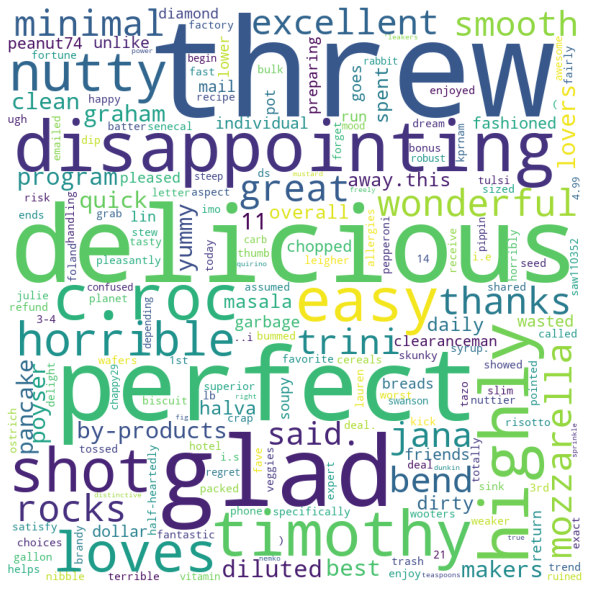

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with

Alert! Model on Numerical columns is unable to predict classes : [4, 3, 1, 2], 
All unique classes are : [4 5 3 1 2]




Accuracy with only numerical columns is : 0.6442424242424243



Some examples where your model misclassified 


Id                        3.580430e+05
HelpfulnessNumerator      2.000000e+00
HelpfulnessDenominator    3.000000e+00
Time                      1.296086e+09
ProductId                 5.762000e+03
UserId                   -1.000000e+00
Name: 3994, dtype: float64 
 predicted : 5, 	 true : 1 


Id                        4.222330e+05
HelpfulnessNumerator      0.000000e+00
HelpfulnessDenominator    0.000000e+00
Time                      1.319155e+09
ProductId                 6.970000e+03
UserId                   -1.000000e+00
Name: 6233, dtype: float64 
 predicted : 5, 	 true : 4 


Id                        2.861560e+05
HelpfulnessNumerator      4.000000e+00
HelpfulnessDenominator    5.000000e+00
Time                      1.283558e+09
ProductId                 8

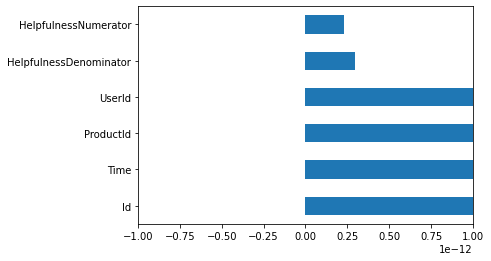



Some features with low feature importance are: 

feature : ['HelpfulnessDenominator'] , the reason could be its variance is only : 64.27166094302704 compared to 26789386727.447334 of most important feature ['Id'] 
feature : ['HelpfulnessNumerator'] , the reason could be its variance is only : 53.73091130556561 compared to 26789386727.447334 of most important feature ['Id'] 
Alert! Combined model is unable to predict classes : [4, 3, 1, 2], 
All unique classes are : [4 5 3 1 2]




Accuracy with entire dataset is : 0.6442424242424243




/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [13]:
svm_clf = LinearSVC()
explain_global(df[:20000], svm_clf, 'Score', training=False)

#Example of training with different models

In [14]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()

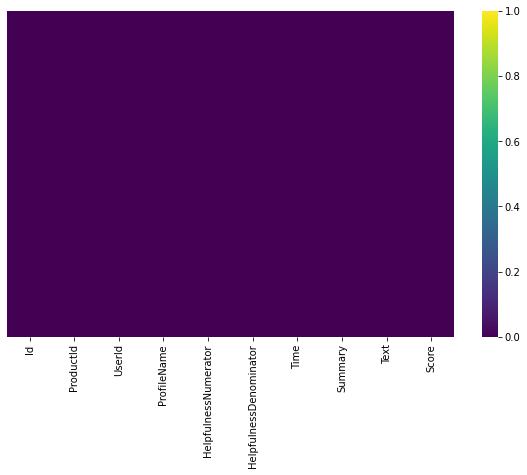

Columns on which embedings will be applied : ['ProfileName', 'Summary', 'Text']


Accuracy with only Categorical columns is : 0.701060606060606 


              precision    recall  f1-score   support

           1       0.60      0.55      0.57       607
           2       0.28      0.11      0.16       317
           3       0.38      0.19      0.25       466
           4       0.39      0.28      0.33       958
           5       0.78      0.92      0.84      4252

    accuracy                           0.70      6600
   macro avg       0.49      0.41      0.43      6600
weighted avg       0.66      0.70      0.67      6600




Alert! your recall   for target label 2 is low (value : 0.10725552050473186), supporting values 317
Reason could be 2 appears only 992 times while length of dataframe is 20000



Alert! your recall   for target label 3 is low (value : 0.19098712446351931), supporting values 466
Reason could be 3 appears only 1416 times while length of dataframe is 20000







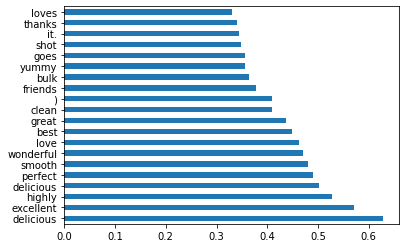

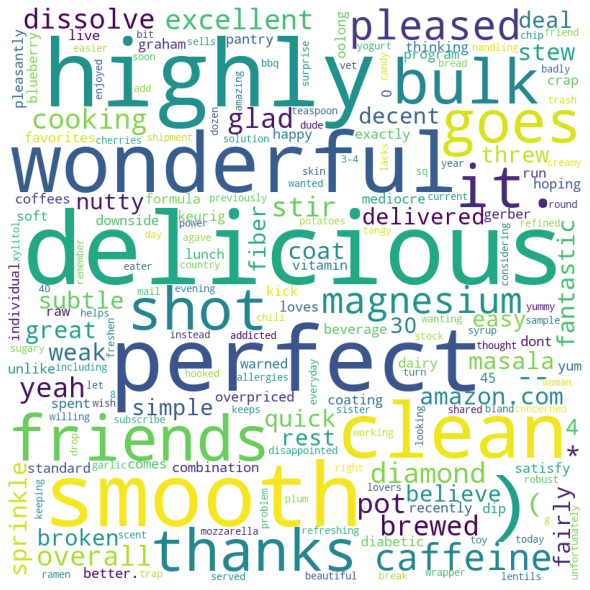

Alert! Model on Numerical columns is unable to predict classes : [4, 3, 1, 2], 
All unique classes are : [4 5 3 1 2]




Accuracy with only numerical columns is : 0.6442424242424243



Some examples where your model misclassified 


Id                        3.962290e+05
HelpfulnessNumerator      0.000000e+00
HelpfulnessDenominator    0.000000e+00
Time                      1.327018e+09
ProductId                -1.000000e+00
UserId                    2.970000e+03
Name: 4200, dtype: float64 
 predicted : 5, 	 true : 2 


Id                        1.019470e+05
HelpfulnessNumerator      4.000000e+00
HelpfulnessDenominator    4.000000e+00
Time                      1.343347e+09
ProductId                 5.754000e+03
UserId                   -1.000000e+00
Name: 4091, dtype: float64 
 predicted : 5, 	 true : 1 


Id                        1.099710e+05
HelpfulnessNumerator      0.000000e+00
HelpfulnessDenominator    0.000000e+00
Time                      1.307232e+09
ProductId                 8

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

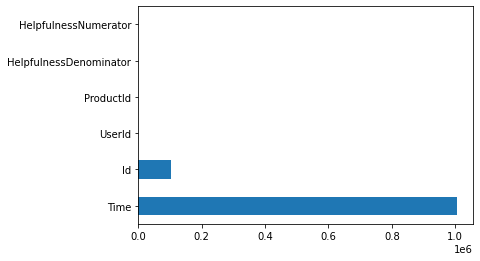



Some features with low feature importance are: 



In [15]:
explain_global(df[:20000], sgd_clf, 'Score', training=False)

# Example of training on other dataset

In [16]:
from sklearn.datasets import load_iris
data = load_iris()
iris_df = pd.DataFrame(data.data, columns = data.feature_names)
iris_df = pd.concat([iris_df, pd.DataFrame(data.target, columns=['target'])], axis=1)

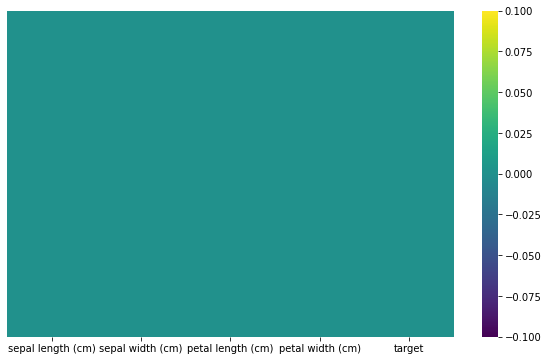

Columns on which embedings will be applied : []


Accuracy with only numerical columns is : 0.98



Some examples where your model misclassified 


sepal length (cm)    6.3
sepal width (cm)     2.8
petal length (cm)    5.1
petal width (cm)     1.5
Name: 46, dtype: float64 
 predicted : 1, 	 true : 2 


sepal length (cm)    6.3
sepal width (cm)     2.8
petal length (cm)    5.1
petal width (cm)     1.5
Name: 46, dtype: float64 
 predicted : 1, 	 true : 2 


sepal length (cm)    6.3
sepal width (cm)     2.8
petal length (cm)    5.1
petal width (cm)     1.5
Name: 46, dtype: float64 
 predicted : 1, 	 true : 2 


sepal length (cm)    6.3
sepal width (cm)     2.8
petal length (cm)    5.1
petal width (cm)     1.5
Name: 46, dtype: float64 
 predicted : 1, 	 true : 2 


sepal length (cm)    6.3
sepal width (cm)     2.8
petal length (cm)    5.1
petal width (cm)     1.5
Name: 46, dtype: float64 
 predicted : 1, 	 true : 2 


sepal length (cm)    6.3
sepal width (cm)     2.8
petal length (cm)    5

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


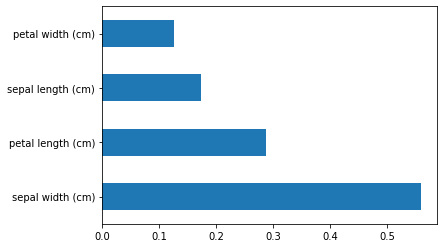



Some features with low feature importance are: 



In [17]:
explain_global(iris_df, svm_clf, 'target', training=False)